In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_univ import scales_solution_1, scales_solution_2

Once again, we make use of the Pokémon data for this exercise.

In [2]:
pokemon = pd.read_csv('./data/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


**Task 1**: There are also variables in the dataset that don't have anything to do with the game mechanics, and are just there for flavor. Try plotting the distribution of Pokémon heights (given in meters). For this exercise, experiment with different axis limits as well as bin widths to see what gives the clearest view of the data.

(0.0, 6.0)

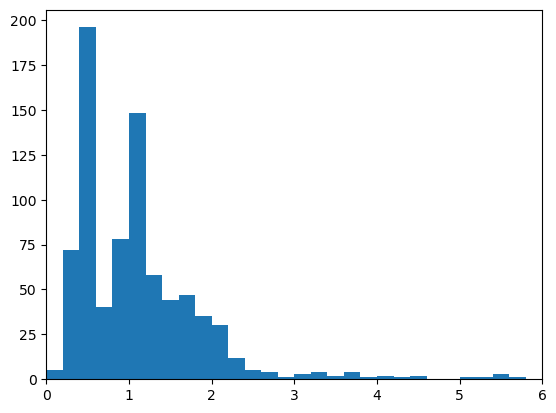

In [3]:
# YOUR CODE HERE
bins = np.arange(0,6.5, 0.2)
plt.hist(data=pokemon, x='height', bins=bins)
plt.xlim((0,6))

There's a very long tail of Pokemon heights. Here, I've focused in on Pokemon of height 6 meters or less, so that I can use a smaller bin size to get a more detailed look at the main data distribution.


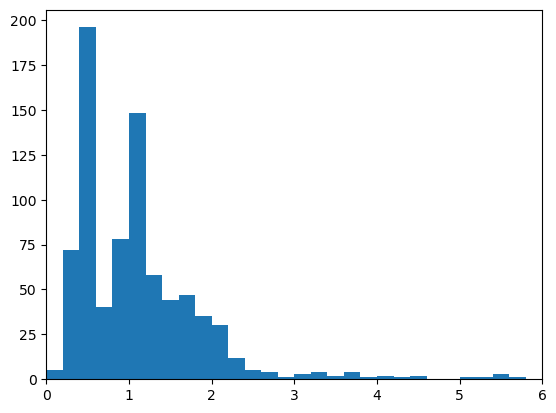

In [4]:
# run this cell to check your work against ours
scales_solution_1()

**Task 2**: In this task, you should plot the distribution of Pokémon weights (given in kilograms). Due to the very large range of values taken, you will probably want to perform an _axis transformation_ as part of your visualization workflow.

In [10]:

pokemon.describe()


,id,generation_id,height,weight,base_experience,hp,attack,defense,speed,special-attack,special-defense
count,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000
mean,404.000000,3.714994,1.162454,61.771128,144.848823,68.748451,76.086741,71.726146,65.830235,69.486989,70.013631
std,233.105126,1.944148,1.081030,111.519355,74.953116,26.032808,29.544598,29.730228,27.736838,29.439715,27.292344
min,1.000000,1.000000,0.100000,0.100000,36.000000,1.000000,5.000000,5.000000,5.000000,10.000000,20.000000
25%,202.500000,2.000000,0.600000,9.000000,66.000000,50.000000,55.000000,50.000000,45.000000,45.000000,50.000000
50%,404.000000,4.000000,1.000000,27.000000,151.000000,65.000000,75.000000,67.000000,65.000000,65.000000,65.000000
75%,605.500000,5.000000,1.500000,63.000000,179.500000,80.000000,95.000000,89.000000,85.000000,90.000000,85.000000
max,807.000000,7.000000,14.500000,999.900000,608.000000,255.000000,181.000000,230.000000,160.000000,173.000000,230.000000


In [19]:
np.log10(pokemon['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

([<matplotlib.axis.XTick at 0x157f95cd0>,
 [Text(0.1, 0, '0.1'),
  Text(0.3, 0, '0.3'),
  Text(1.0, 0, '1'),
  Text(3.0, 0, '3'),
  Text(10.0, 0, '10'),
  Text(30.0, 0, '30'),
  Text(100.0, 0, '100'),
  Text(300.0, 0, '300'),
  Text(1000.0, 0, '1000')])

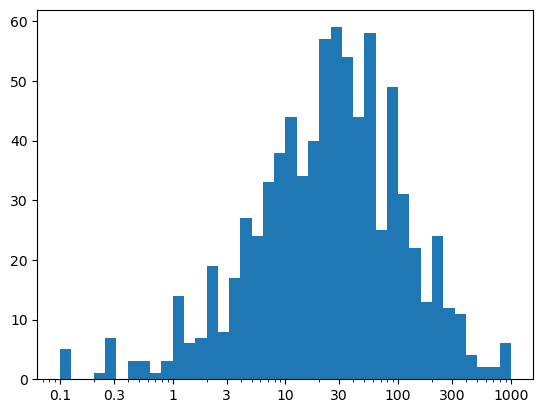

In [38]:
import math

# YOUR CODE HERE
bins = 10** np.arange(math.log10(pokemon['weight'].min()), math.log10(pokemon['weight'].max())+0.1, 0.1)
plt.xscale('log')
plt.hist(data=pokemon, x='weight', bins=bins)
plt.xticks()
## Generate the x-ticks you want to apply
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
## Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)

In [30]:
bins

array([1.00000000e-01, 1.25892541e-01, 1.58489319e-01, 1.99526231e-01,
       2.51188643e-01, 3.16227766e-01, 3.98107171e-01, 5.01187234e-01,
       6.30957344e-01, 7.94328235e-01, 1.00000000e+00, 1.25892541e+00,
       1.58489319e+00, 1.99526231e+00, 2.51188643e+00, 3.16227766e+00,
       3.98107171e+00, 5.01187234e+00, 6.30957344e+00, 7.94328235e+00,
       1.00000000e+01, 1.25892541e+01, 1.58489319e+01, 1.99526231e+01,
       2.51188643e+01, 3.16227766e+01, 3.98107171e+01, 5.01187234e+01,
       6.30957344e+01, 7.94328235e+01, 1.00000000e+02, 1.25892541e+02,
       1.58489319e+02, 1.99526231e+02, 2.51188643e+02, 3.16227766e+02,
       3.98107171e+02, 5.01187234e+02, 6.30957344e+02, 7.94328235e+02])

In [31]:
np.arange(math.log10(pokemon['weight'].min()), math.log10(pokemon['weight'].max()), 0.1)

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01,
        1.00000000e+00,  1.10000000e+00,  1.20000000e+00,  1.30000000e+00,
        1.40000000e+00,  1.50000000e+00,  1.60000000e+00,  1.70000000e+00,
        1.80000000e+00,  1.90000000e+00,  2.00000000e+00,  2.10000000e+00,
        2.20000000e+00,  2.30000000e+00,  2.40000000e+00,  2.50000000e+00,
        2.60000000e+00,  2.70000000e+00,  2.80000000e+00,  2.90000000e+00])

Since Pokemon weights are so skewed, I used a log transformation on the x-axis. Bin edges are in increments of 0.1 powers of ten, with custom tick marks to demonstrate the log scaling.


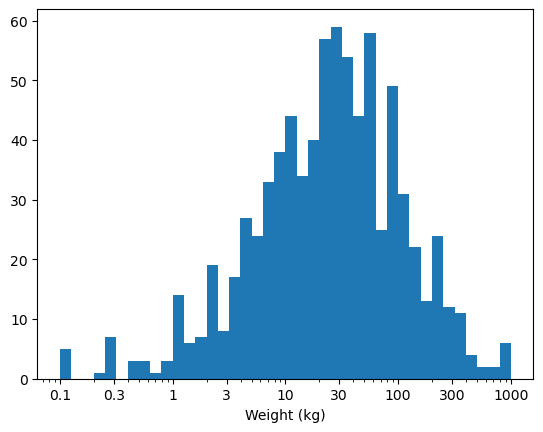

In [36]:
# run this cell to check your work against ours
scales_solution_2()